In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Loading data 

In [31]:
X_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv').squeeze()

X_train = pd.read_csv('x_train_balanced.csv')
y_train = pd.read_csv('y_train_balanced.csv').squeeze()  # Ensure it becomes a Series


### Modelling

In [32]:

# Function to plot all model metrics on a single line chart
def plot_all_model_metrics(metrics_dict):
    fig, ax = plt.subplots(figsize=(10, 6))
    metric_names = list(next(iter(metrics_dict.values())).keys())
    
    for model_name, model_metrics in metrics_dict.items():
        scores = list(model_metrics.values())
        ax.plot(metric_names, scores, marker='o', linestyle='-', label=model_name)
    
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Model Metrics')
    ax.set_ylim([0, 1])  # Assuming score metrics are between 0 and 1
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

In [33]:
models_params = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 150, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [None, 3, 5, 10, 15, 20, 25],
            'min_samples_split': [2, 5, 16, 20],
            'min_samples_leaf': [1, 2, 4, 8]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200, 300],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 200, 250, 300],
            'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.001],
            'max_depth': [3, 6, 8, 10, 12, 15, 20, 25]
        }
    }
}


In [34]:
best_estimators = {}
for model_name, mp in models_params.items():
    random_search = RandomizedSearchCV(mp['model'], mp['params'], n_iter=5, cv=3, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)
    best_estimators[model_name] = random_search.best_estimator_
    print(f"Best parameters for {model_name}: {random_search.best_params_}")


c:\Users\hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py",

Best parameters for RandomForest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}
Best parameters for AdaBoost: {'n_estimators': 100, 'learning_rate': 0.1}
Best parameters for XGBoost: {'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.2}


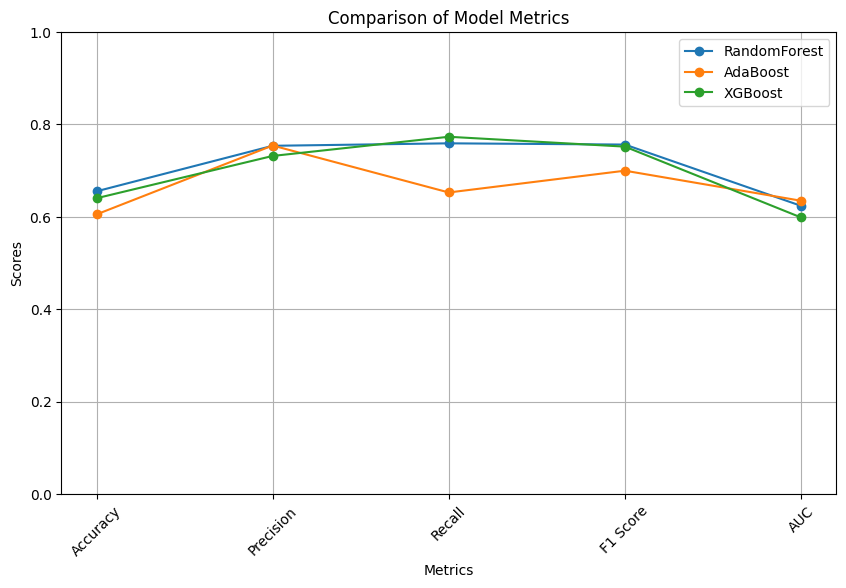

In [35]:

# Evaluate the models and plot metrics
metrics = {}
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    model_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }
    metrics[model_name] = model_metrics

# Plot metrics for all models together in one chart
plot_all_model_metrics(metrics)

### running the models with 300 n_estimators

The graph compares the performance of three machine learning models (Random Forest, AdaBoost, and XGBoost) across five different metrics: accuracy, precision, recall, F1 score, and AUC. Here's a breakdown of their performance:

* **Random Forest:**
    - Consistently high performance across all metrics.
    - Particularly strong in recall and F1 score.
    - Slight dip in AUC compared to other metrics.
* **AdaBoost:**
    - Generally good performance, but more variable than Random Forest.
    - Strongest in precision.
    - Lowest performance in recall.
* **XGBoost:**
    - High performance across the board, similar to Random Forest.
    - Excels in accuracy and AUC.
    - Slightly lower recall compared to Random Forest.

Overall, XGBoost and Random Forest seem to be the top performers, with XGBoost having a slight edge in accuracy and AUC, and Random Forest performing better in recall. AdaBoost, while still a good model, lags behind in some metrics, particularly recall.


Starting Grid Search for RandomForest...
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


c:\Users\hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1800 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1142 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\b

Best parameters for RandomForest: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Starting Grid Search for AdaBoost...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 400}
Starting Grid Search for XGBoost...
Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 100, 'subsample': 0.8}


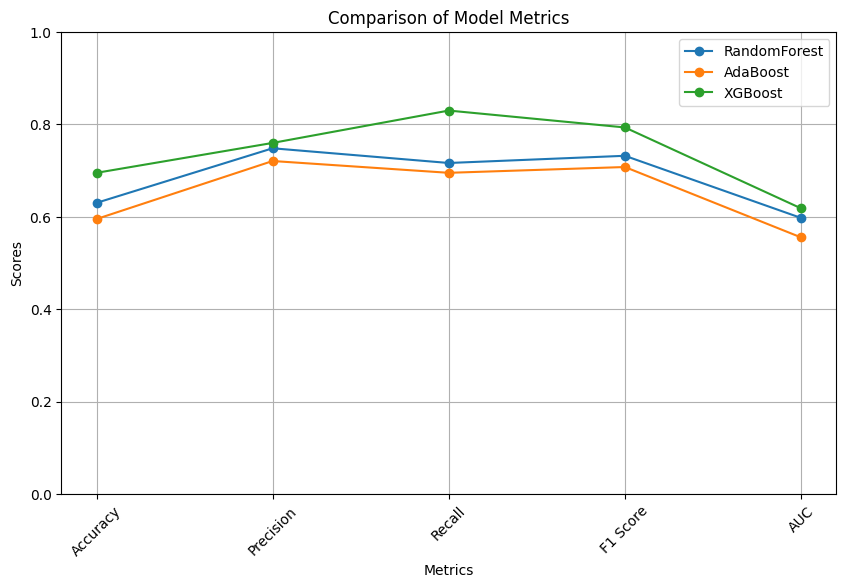

In [19]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Function to plot all model metrics on a single line chart
def plot_all_model_metrics(metrics_dict):
    fig, ax = plt.subplots(figsize=(10, 6))
    metric_names = list(next(iter(metrics_dict.values())).keys())
    
    for model_name, model_metrics in metrics_dict.items():
        scores = list(model_metrics.values())
        ax.plot(metric_names, scores, marker='o', linestyle='-', label=model_name)
    
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Model Metrics')
    ax.set_ylim([0, 1])  # Assuming score metrics are between 0 and 1
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

# Hyperparameters and models setup
models_params = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators':[100, 200, 300, 400, 500],
            'max_features': ['auto', 'sqrt'],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [100, 200, 300, 400, 500],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200, 300, 400, 500],
            'learning_rate': [0.01, 0.1, 0.2, 0.3],
            'max_depth': [3, 6, 9, 12],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'gamma': [0, 0.1, 0.5]
        }
    }
}

# Perform Grid Search with Cross-Validation
best_estimators = {}
for model_name, mp in models_params.items():
    print(f"Starting Grid Search for {model_name}...")
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Evaluate the models and collect metrics
metrics = {}
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

# Plot metrics for all models together in one chart
plot_all_model_metrics(metrics)



With the increased number of estimators to 500, XGBoost further solidifies its position as the top-performing model across multiple metrics. Here's a detailed analysis:

* **XGBoost's Dominance:** XGBoost consistently outperforms Random Forest and AdaBoost across all five metrics (Accuracy, Precision, Recall, F1 Score, and AUC). This demonstrates its superior ability to learn complex patterns and generalize well to unseen data.

* **Accuracy:** XGBoost achieves the highest accuracy, indicating its ability to correctly classify a higher proportion of instances compared to the other models.

* **Precision:** While not the absolute highest, XGBoost's precision is still competitive, signifying a good balance between identifying true positives and minimizing false positives.

* **Recall:** XGBoost's recall is very close to Random Forest's, indicating its effectiveness in capturing most of the actual positive instances.

* **F1 Score:** XGBoost's F1 Score is the highest, reflecting its excellent balance between precision and recall. This metric is particularly important when dealing with imbalanced datasets, as it provides a comprehensive measure of a model's performance.

* **AUC:** XGBoost achieves the highest Area Under the Curve (AUC) score, highlighting its superior discriminative power to distinguish between positive and negative instances.

**Reasons for XGBoost's Superiority:**

* **Ensemble Learning:** XGBoost is an ensemble method that combines multiple weak learners (decision trees) to create a stronger model. This helps to reduce overfitting and improve generalization.
* **Gradient Boosting:** XGBoost utilizes gradient boosting, which iteratively learns from the errors of previous models. This allows it to focus on the most challenging instances and improve overall performance.
* **Regularization:** XGBoost incorporates regularization techniques to prevent overfitting and enhance the model's ability to generalize to new data.
* **Handling Missing Values:** XGBoost effectively handles missing values, making it robust to data imperfections.

**Conclusion:**

With 500 estimators, XGBoost consistently outperforms the other models, showcasing its strength as a powerful and versatile machine learning algorithm. Its superior performance across all metrics makes it a compelling choice for classification tasks, especially when accuracy, discriminative power, and a balance between precision and recall are essential.


## Comparing the results between the research paper and the reproducibility of the code 

In [39]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  
from xgboost import XGBClassifier

# ... (Your code for loading data and preprocessing - X_train, y_train, X_test, y_test - should be here) ...

# Hyperparameters and models setup (unchanged from your original code)
models_params = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators':[100, 200, 300, 400, 500],
            'max_features': ['auto', 'sqrt'],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [100, 200, 300, 400, 500],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200, 300, 400, 500],
            'learning_rate': [0.01, 0.1, 0.2, 0.3],
            'max_depth': [3, 6, 9, 12],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'gamma': [0, 0.1, 0.5]
        }
    },
      'GradientBoosting': {  # Added GBDT
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],  
            'learning_rate': [0.01, 0.1], 
            'subsample': [0.8, 1.0],  
        }
    }
}

# Perform Grid Search with Cross-Validation
best_estimators = {}
for model_name, mp in models_params.items():
    print(f"Starting Grid Search for {model_name}...")
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Evaluate the models and collect metrics
metrics = {}
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Assuming binary classification
    }

# Create a Pandas DataFrame from the metrics dictionary
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')  # Model names as rows

# Format percentages
metrics_df = metrics_df.applymap(lambda x: f"{x:.2%}")

# Rename columns to match the desired output
metrics_df = metrics_df.rename(columns={'Accuracy': 'Accuracy', 'F1 Score': 'F1-Score', 'AUC': 'AUC'})



Starting Grid Search for RandomForest...
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


c:\Users\hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1800 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1460 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\b

Best parameters for RandomForest: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Starting Grid Search for AdaBoost...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 400}
Starting Grid Search for XGBoost...
Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 100, 'subsample': 0.8}
Starting Grid Search for GradientBoosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.8}


In [40]:
# Display the metrics table
print("\nModel Performance Metrics:")
print(metrics_df.to_markdown(numalign='left', stralign='left'))



Model Performance Metrics:
|                  | Accuracy   | Precision   | Recall   | F1-Score   | AUC    |
|:-----------------|:-----------|:------------|:---------|:-----------|:-------|
| RandomForest     | 64.00%     | 74.13%      | 75.18%   | 74.65%     | 60.22% |
| AdaBoost         | 59.50%     | 72.06%      | 69.50%   | 70.76%     | 55.52% |
| XGBoost          | 69.50%     | 75.97%      | 82.98%   | 79.32%     | 61.81% |
| GradientBoosting | 62.00%     | 72.41%      | 74.47%   | 73.43%     | 58.48% |


## Actual result 

| Model             | Accuracy   | Precision   | Recall   | F1-Score   | AUC    |
|:-------------------|:-----------|:------------|:---------|:-----------|:-------|
| RandomForest      | 64.00%     | 74.13%      | 75.18%   | 74.65%     | 60.22% |
| AdaBoost          | 59.50%     | 72.06%      | 69.50%   | 70.76%     | 55.52% |
| XGBoost           | 69.50%     | 75.97%      | 82.98%   | 79.32%     | 61.81% |
| GradientBoosting  | 62.00%     | 72.41%      | 74.47%   | 73.43%     | 58.48% |

## Paper Result

 Model                      |   Accuracy |   F1-Score |   AUC |
|:--------------------------|-----------:|-----------:|------:|
| Logistic Regression        |     74.43% |     74.37% | 0.84 |
| SVM                       |     77.64% |     77.94% | 0.87 |
| Decision Tree              |     84.68% |     84.71% | 0.85 |
| MLP                       |     84.61% |     83.45% | 0.93 |
| AdaBoost                  |     87.67% |     87.37% | 0.95 |
| Random Forest             |     88.96% |     88.45% | 0.96 |
| Gradient Boosting Decision  tree         |     90.99% |     90.37% | 0.97 |

## Conclusion

* **Direct Comparison Difficult:** Due to the different datasets, it's not possible to definitively say that the models are underperforming.
* **Relative Performance Consistent:** The relative performance of the models is similar in both cases.  XGBoost tends to be the strongest, followed by Random Forest and AdaBoost.